In [56]:
import pandas as pd
import numpy as np
import pickle #for save the file and make it into a binary file
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential #type: ignore
from tensorflow.keras.layers import Dense #type: ignore
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard #type: ignore

In [57]:
data = pd.read_csv('placementdata.csv')
data.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [59]:
data['ExtracurricularActivities'] = data['ExtracurricularActivities'].map({'No': 0, 'Yes': 1})
data['PlacementTraining'] = data['PlacementTraining'].map({'No': 0, 'Yes': 1})
data['PlacementStatus'] = data['PlacementStatus'].map({'NotPlaced': 0, 'Placed': 1})

In [60]:
data.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,0,0,61,79,0
1,2,8.9,0,3,2,90,4.0,1,1,78,82,1
2,3,7.3,1,2,2,82,4.8,1,0,79,80,0
3,4,7.5,1,1,2,85,4.4,1,1,81,80,1
4,5,8.3,1,2,2,86,4.5,1,1,74,88,1


In [61]:
x = data.drop(['StudentID', 'PlacementStatus'], axis=1)
y = data['PlacementStatus']

In [62]:
x

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks
0,7.5,1,1,1,65,4.4,0,0,61,79
1,8.9,0,3,2,90,4.0,1,1,78,82
2,7.3,1,2,2,82,4.8,1,0,79,80
3,7.5,1,1,2,85,4.4,1,1,81,80
4,8.3,1,2,2,86,4.5,1,1,74,88
...,...,...,...,...,...,...,...,...,...,...
9995,7.5,1,1,2,72,3.9,1,0,85,66
9996,7.4,0,1,0,90,4.8,0,0,84,67
9997,8.4,1,3,0,70,4.8,1,1,79,81
9998,8.9,0,3,2,87,4.8,1,1,71,85


In [63]:
y

0       0
1       1
2       0
3       1
4       1
       ..
9995    0
9996    1
9997    1
9998    1
9999    0
Name: PlacementStatus, Length: 10000, dtype: int64

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [65]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_train_scaled

array([[ 0.47139169, -0.06556468,  1.12252363, ..., -1.66274047,
         1.32455626,  1.51440106],
       [-0.1536667 , -0.06556468, -0.0307047 , ...,  0.60141677,
        -0.78588907,  1.17849265],
       [ 0.78392088, -0.06556468,  1.12252363, ...,  0.60141677,
         0.65305093, -1.06089672],
       ...,
       [-0.46619589, -0.06556468, -1.18393304, ...,  0.60141677,
        -1.36146508, -0.94892725],
       [ 0.47139169, -0.06556468, -1.18393304, ..., -1.66274047,
        -1.36146508, -0.94892725],
       [ 0.78392088, -0.06556468,  1.12252363, ...,  0.60141677,
         1.22862693, -0.27711044]], shape=(8000, 10))

ANN IMPLEMENTATION

In [66]:
from tensorflow.keras import regularizers #type: ignore
from tensorflow.keras.layers import Dropout #type: ignore

model = Sequential([
    Dense(128, activation='relu', input_dim=x_train_scaled.shape[1], kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2), #dropout used to prevent overfitting
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

c:\Desktop\Capgemini Training\Deep Learning\dlenv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [67]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [68]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [69]:
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [70]:
history = model.fit(x_train_scaled, y_train, validation_data=(x_test_scaled, y_test), epochs=100, batch_size=32, callbacks=[early_stop, tensorboard_callback])

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7960 - loss: 0.5589 - val_accuracy: 0.7925 - val_loss: 0.4955
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7999 - loss: 0.4711 - val_accuracy: 0.7970 - val_loss: 0.4571
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8027 - loss: 0.4504 - val_accuracy: 0.7895 - val_loss: 0.4483
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8049 - loss: 0.4436 - val_accuracy: 0.7925 - val_loss: 0.4471
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8031 - loss: 0.4425 - val_accuracy: 0.7895 - val_loss: 0.4469
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8012 - loss: 0.4405 - val_accuracy: 0.7920 - val_loss: 0.4425
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8039 - loss: 0.4385 - val_accuracy: 0.7940 - val_loss: 0.4408
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8025 - loss: 0.4396 - val_accu

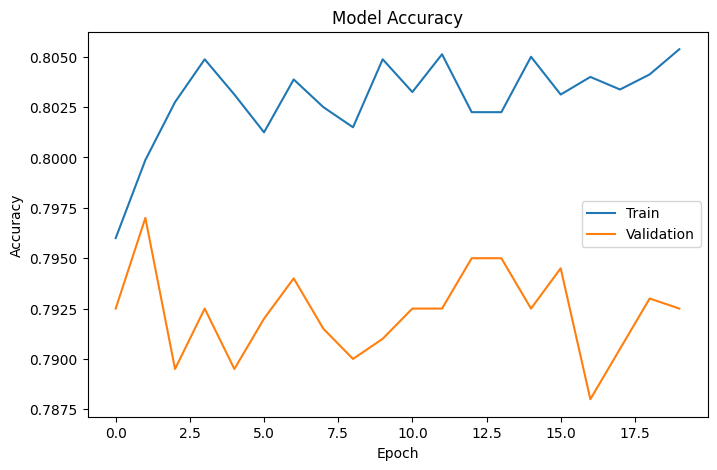

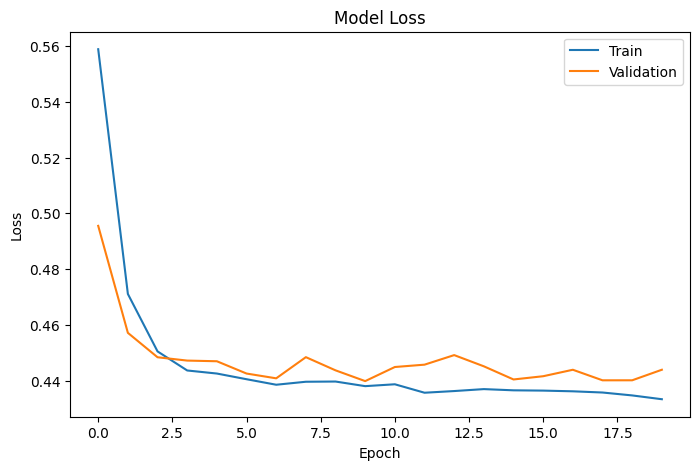

In [71]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

In [72]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

model.save('placement_ann_model.h5')

USING USER INPUT

In [73]:
import pandas as pd
import pickle
from tensorflow.keras.models import load_model #type: ignore

scaler_loaded = pickle.load(open('scaler.pkl', 'rb'))
model_loaded = load_model('placement_ann_model.h5')

new_student = pd.DataFrame({
    'CGPA': [9.5],
    'Internships': [2],
    'Projects': [3],
    'Workshops/Certifications': [1],
    'AptitudeTestScore': [85],
    'SoftSkillsRating': [4],
    'ExtracurricularActivities': [1],
    'PlacementTraining': [1],
    'SSC_Marks': [80],
    'HSC_Marks': [85]
})

In [74]:
new_student_scaled = scaler_loaded.transform(new_student)

prediction = model_loaded.predict(new_student_scaled)
probability = prediction[0][0]

if probability > 0.5:
    print(f"Placed {probability: .2f}")    
else:
    print(f"Not Placed {probability: .2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Placed  0.85


In [75]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [76]:
%tensorboard --logdir logs/fit --port 6006

Reusing TensorBoard on port 6006 (pid 25456), started 0:00:57 ago. (Use '!kill 25456' to kill it.)